In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Reading the csv.txt file
data=pd.read_csv("house_rental_data.csv.txt",delimiter=',')

In [3]:
data.drop(columns=['Unnamed: 0'],inplace =True)

In [4]:
#Converting .txt to .csv format
data.to_csv("House_rental_data.csv",index=False)

In [5]:
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [6]:
data.rename(columns={'Living.Room':'LivingRoom'},inplace=True)

In [7]:
data.head()

,Sqft,Floor,TotalFloor,Bedroom,LivingRoom,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [8]:
data.shape

(645, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sqft        645 non-null    float64
 1   Floor       645 non-null    int64  
 2   TotalFloor  645 non-null    int64  
 3   Bedroom     645 non-null    int64  
 4   LivingRoom  645 non-null    int64  
 5   Bathroom    645 non-null    int64  
 6   Price       645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [10]:
data.describe()

,Sqft,Floor,TotalFloor,Bedroom,LivingRoom,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [11]:
data.isnull().sum()

Sqft          0
Floor         0
TotalFloor    0
Bedroom       0
LivingRoom    0
Bathroom      0
Price         0
dtype: int64

In [12]:
data=data.drop_duplicates()

In [13]:
data.shape[0]

579

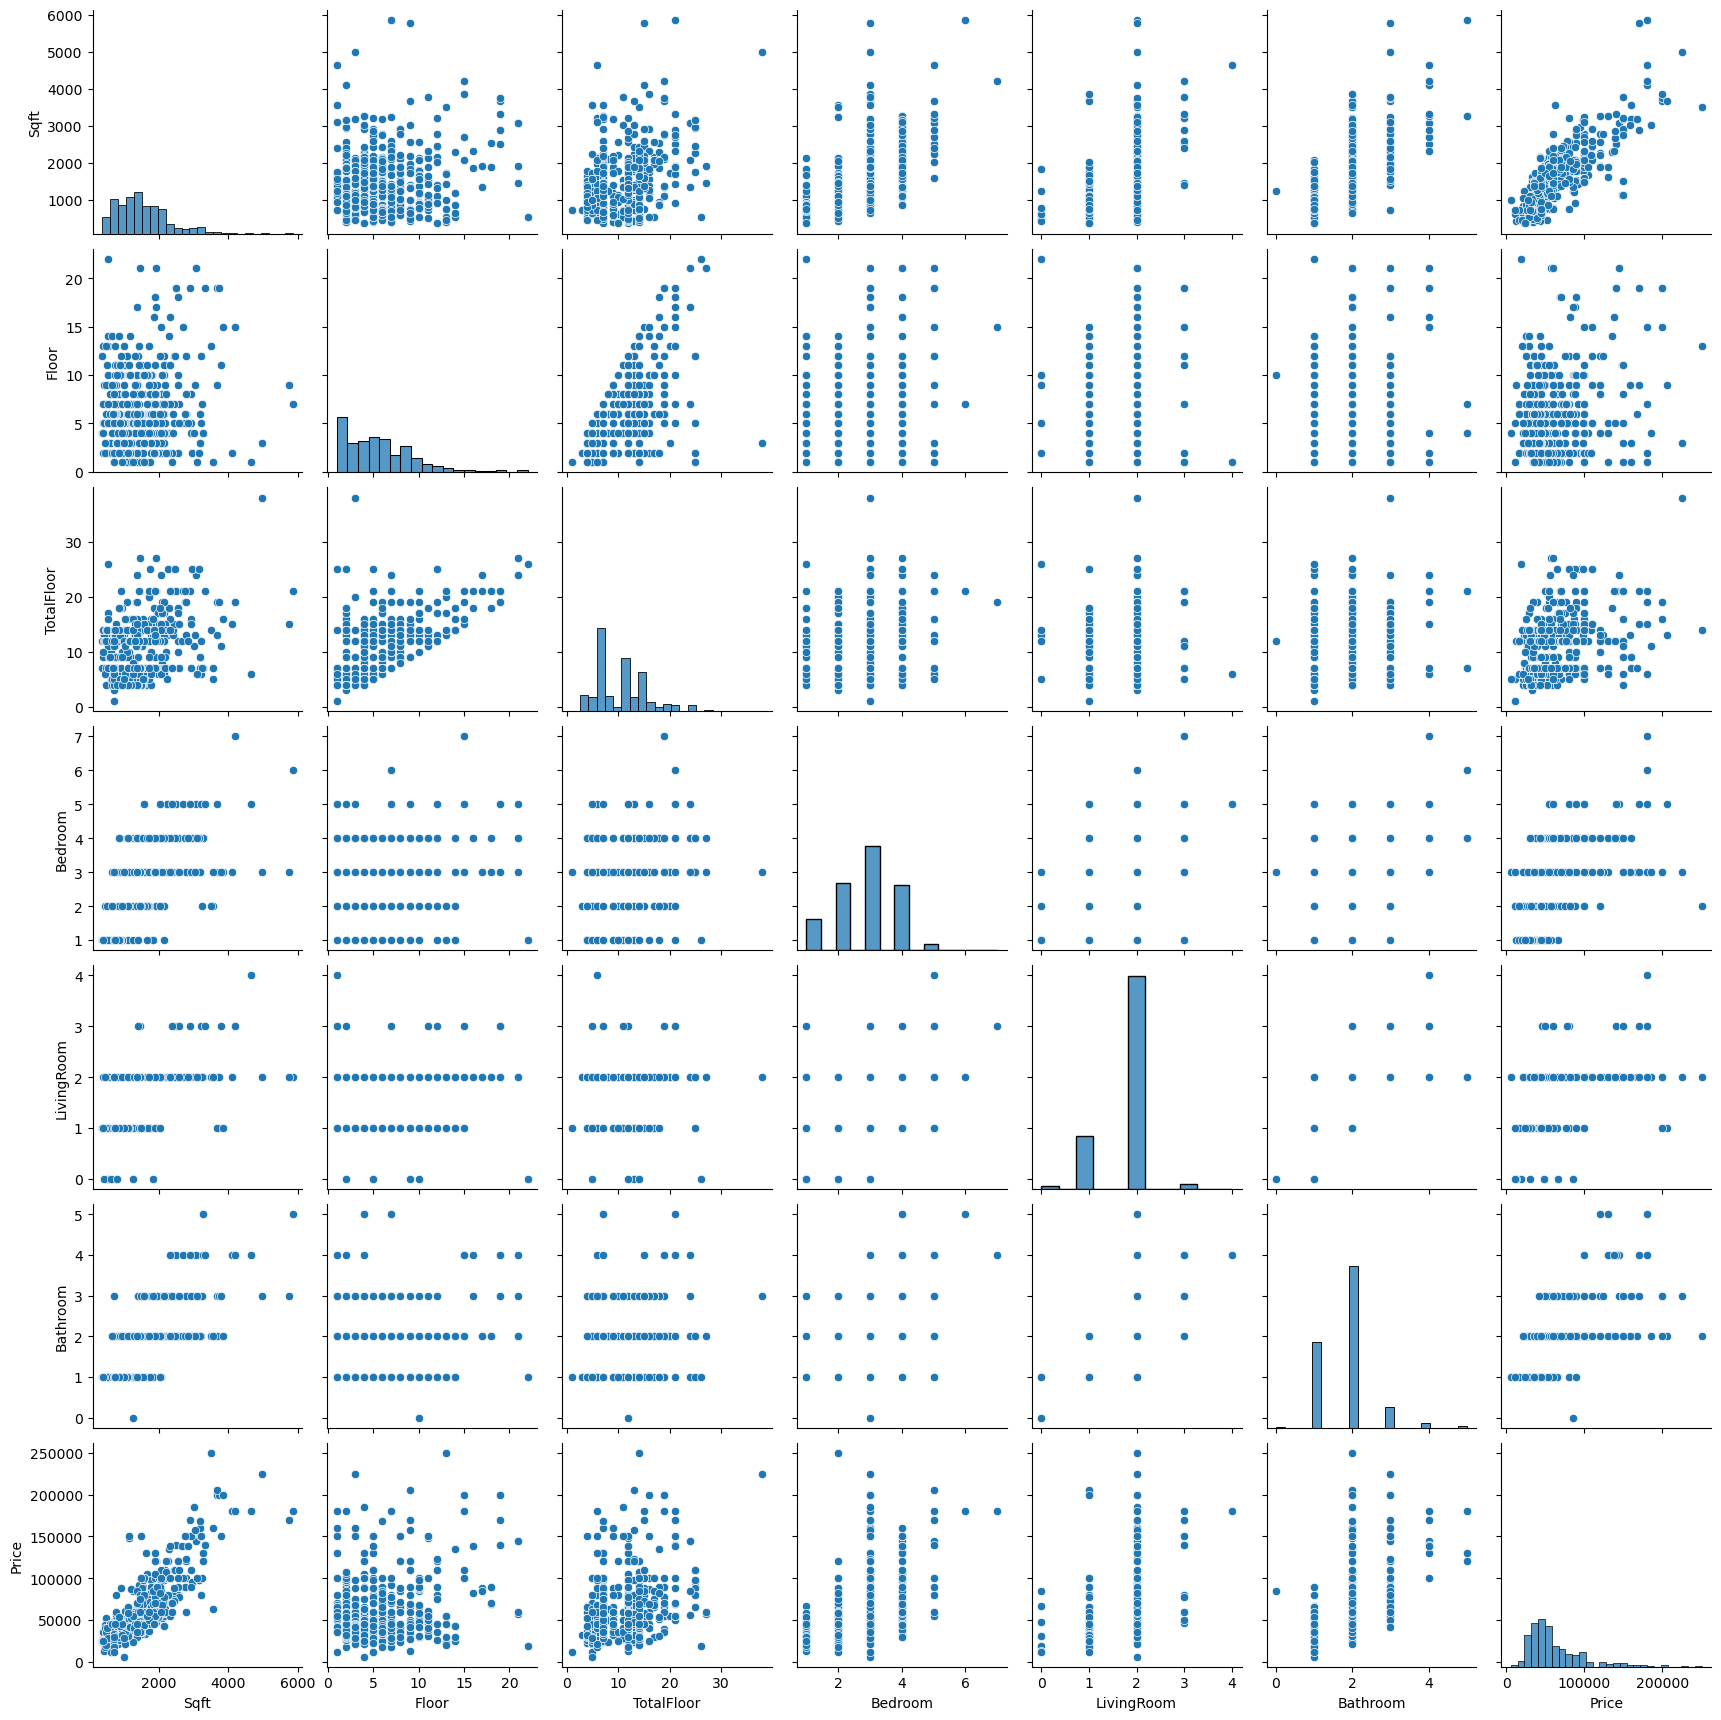

In [14]:
sns.pairplot(data)
plt.show()

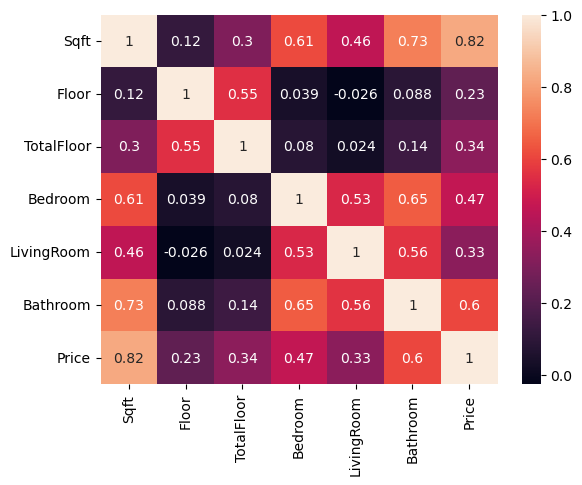

In [15]:
sns.heatmap(data.corr(),annot=True)
plt.show()

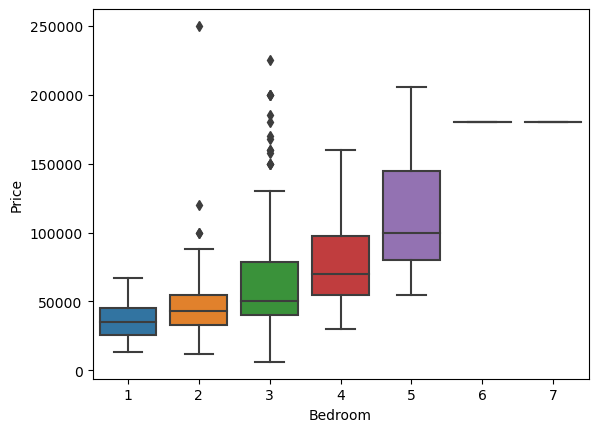

In [16]:
sns.boxplot(x="Bedroom",y="Price",data=data)
plt.show()

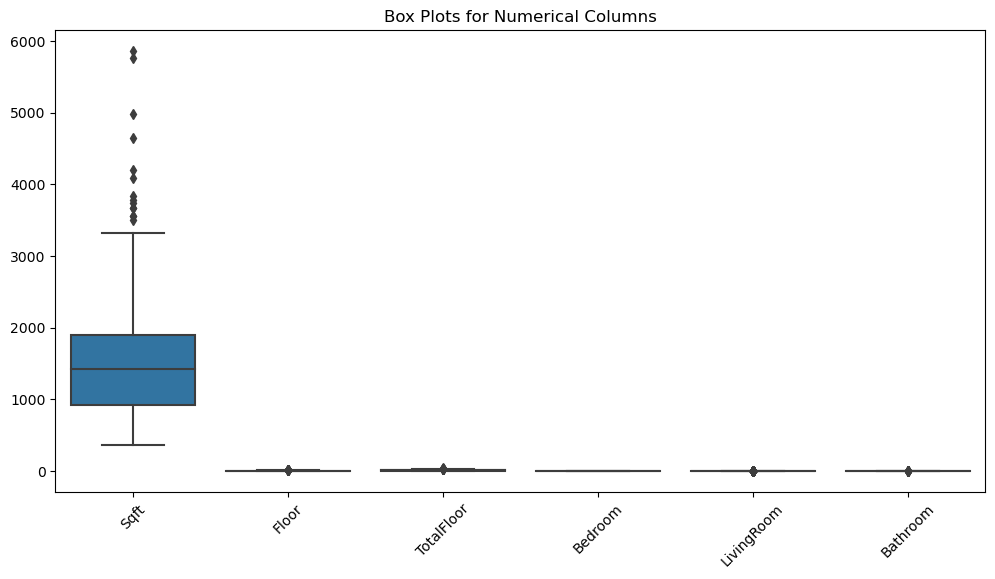

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = ['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'LivingRoom', 'Bathroom']

# Create box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns])
plt.title("Box Plots for Numerical Columns")
plt.xticks(rotation=45)
plt.show()


#### Since sqrt has outliers ,we have to perform handling the outlier values

#### I will be performing both dropping as well as imputation in order to handle the outliers.
#### Because in some cases chooseing to  drop the outliers, the outliers  could have actually valid data points that were essential for the model's generalization, their removal could impact the model's ability to make accurate predictions.Thus we will be looking at both the methods.

In [18]:
column_name="Sqft"
Q1=data[column_name].quantile(0.25)
Q3=data[column_name].quantile(0.75)
IQR=Q3-Q1

threshold=1.5
lower_bound=Q1-threshold*IQR
upper_bound=Q3+threshold*IQR

data_no_outliers=data.drop(data[(data[column_name]<lower_bound) | (data[column_name]>upper_bound)].index)


In [19]:
data_no_outliers.shape[0]

565

### Handling the outliers by dropping them

In [26]:
#Train - Test split
X_drop=data_no_outliers.drop(columns=['Price'])
y_drop=data_no_outliers['Price']
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_drop, y_drop, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
X_train_drop_scaled = scaler.fit_transform(X_train_drop)
X_test_drop_scaled = scaler.transform(X_test_drop)

### Model Building and Evaluation

In [28]:
# 1.Linear Regression model
model_drop = LinearRegression()

In [29]:
model_drop.fit(X_train_drop_scaled, y_train_drop)
y_pred_drop = model_drop.predict(X_test_drop_scaled)

In [30]:
mse_drop = mean_squared_error(y_test_drop, y_pred_drop)
r2_drop = r2_score(y_test_drop, y_pred_drop)
linear_score_drop= linear_model.score(X_test_drop_scaled, y_test_drop)

In [32]:
print(f"Linear Regression Mean Squared Error: {mse_drop}")
print(f"Linear Regression R-squared: {r2_drop}")
print(f"Linear Regression Score: {linear_score_drop}")

Linear Regression Mean Squared Error: 222041448.07059243
Linear Regression R-squared: 0.6769239026911242
Linear Regression Score: 0.6769239026911242


In [33]:
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
# 2.Gradient Boosting model
grad = GradientBoostingRegressor()

In [35]:
grad.fit(X_train_drop_scaled, y_train_drop)
grad_score = grad.score(X_test_drop_scaled, y_test_drop)

In [36]:
print(f"Gradient Boosting R-squared: {grad_score}")

Gradient Boosting R-squared: 0.6931200921063476


### Handling outliers by imputation

In [39]:
# Define the column name
column_name = 'Sqft'
# Impute outliers
median_value = data[column_name].median()
data_imputed = data.copy()
data_imputed[column_name] = data_imputed[column_name].apply(lambda x: x if (x >= lower_bound) and (x <= upper_bound) else median_value)

In [40]:
# Split the data
X_impute = data_imputed.drop(columns=['Price'])
y_impute = data_imputed['Price']


In [41]:
# Split into train and test sets
X_train_impute, X_test_impute, y_train_impute, y_test_impute = train_test_split(X_impute, y_impute, test_size=0.2, random_state=42)



In [42]:
# Standardize the features
scaler = StandardScaler()

X_train_impute_scaled = scaler.fit_transform(X_train_impute)
X_test_impute_scaled = scaler.transform(X_test_impute)

In [43]:
# Building  and training model

model_impute = LinearRegression()

In [44]:
model_impute.fit(X_train_impute_scaled, y_train_impute)

LinearRegression()

In [45]:
# Evaluate models
y_pred_impute = model_impute.predict(X_test_impute_scaled)

In [47]:
# Evaluate models for imputing outliers approach
mse_impute = mean_squared_error(y_test_impute, y_pred_impute)
r2_impute = r2_score(y_test_impute, y_pred_impute)
linear_score_impute = model_impute.score(X_test_impute_scaled, y_test_impute)


In [48]:
print("\nImputing outliers approach:")
print(f"Linear Regression Mean Squared Error: {mse_impute}")
print(f"Linear Regression R-squared: {r2_impute}")
print(f"Linear Regression Score: {linear_score_impute}")


Imputing outliers approach:
Linear Regression Mean Squared Error: 470516198.7656022
Linear Regression R-squared: 0.520046045953014
Linear Regression Score: 0.520046045953014


In [50]:
# 2.Gradient Boosting model
grad_impute = GradientBoostingRegressor()
grad_impute.fit(X_train_impute_scaled, y_train_impute)


GradientBoostingRegressor()

In [51]:
# Evaluate Gradient Boosting model for imputing outliers approach
grad_score_impute = grad_impute.score(X_test_impute_scaled, y_test_impute)


In [52]:
print("\nGradient Boosting for Imputing Outliers Approach:")
print(f"Gradient Boosting R-squared: {grad_score_impute}")


Gradient Boosting for Imputing Outliers Approach:
Gradient Boosting R-squared: 0.6715153642197808


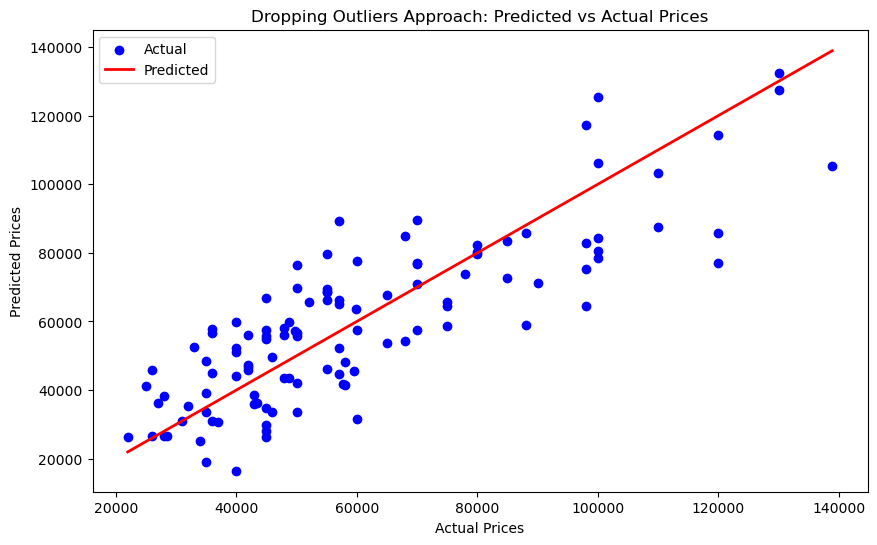

In [57]:
# Scatter plot for dropping outliers approach
plt.figure(figsize=(10, 6))
plt.scatter(y_test_drop, y_pred_drop, color='blue', label='Actual')  # Corrected label
plt.plot([min(y_test_drop), max(y_test_drop)], [min(y_test_drop), max(y_test_drop)], color='red', linewidth=2,label='Predicted')
plt.title("Dropping Outliers Approach: Predicted vs Actual Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.show()


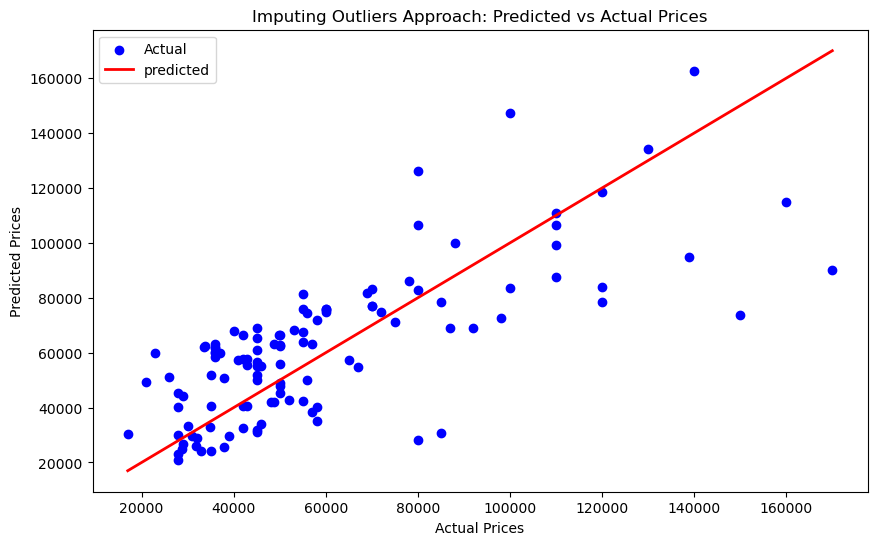

In [56]:
# Scatter plot for imputing outliers approach
plt.figure(figsize=(10, 6))
plt.scatter(y_test_impute, y_pred_impute, color='blue', label='Actual')  # Corrected label
plt.plot([min(y_test_impute), max(y_test_impute)], [min(y_test_impute), max(y_test_impute)], color='red', linewidth=2,label='predicted')
plt.title("Imputing Outliers Approach: Predicted vs Actual Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.show()